In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
mpl.style.use('seaborn-darkgrid')
mpl.rcParams.update({'font.size': 18})

In [3]:
pd.options.display.max_rows = 10

# Probability

This chapter takes a geometric view of probability theory and relates it to
familiar concepts in linear algebra and geometry.  This approach connects your
natural geometric intuition to the key abstractions in probability that can
help guide your reasoning.  This is particularly important in probability
because it is easy to be misled. We need a bit of rigor and some
intuition to guide us.

In grade school, you were introduced to the natural numbers (i.e., `1,2,3,..`)
and you learned how to manipulate them by operations like addition,
subtraction, and multiplication. Later, you were introduced to positive and
negative numbers and were again taught how to manipulate them. Ultimately, you
were introduced to the calculus of the real line, and learned how to
differentiate, take limits, and so on. This progression provided more
abstractions, but also widened the field of problems you could successfully
tackle. The same is true of probability. **One way to think about probability is
as a  new number concept that allows you to tackle problems that have a special
kind of *uncertainty* built into them. Thus, the key idea is that there is some
number, say $x$, with a traveling companion, say, $f(x)$, and this companion
represents the uncertainties about the value of $x$ as if looking at the number
$x$ through a frosted window. The degree of opacity of the window is
represented by $f(x)$.**  If we want to manipulate $x$, then we have to figure
out what to do with $f(x)$. For example if we want $y= 2 x $, then we have to
understand how $f(x)$ generates $f(y)$. 

Where is the *random* part?   To conceptualize this, we need still **another
analogy: think about a beehive with the swarm around it representing $f(x)$,
and the hive itself, which you can barely see through the swarm, as $x$.** The
random piece is you don't know *which* bee in particular is going to sting you!
Once this happens the uncertainty evaporates.
Up until that happens, all we have is a concept of a swarm (i.e., density of
bees) which represents a *potentiality* of which bee will ultimately sting.
In summary, one way to think about probability is as a way of carrying through
mathematical reasoning (e.g., adding, subtracting, taking
limits) with a notion of potentiality that is so-transformed by these
operations.

## Understanding Probability Density

In order to understand the heart of modern probability, which is built
on the **Lesbesgue theory of integration**, we need to extend the concept
of integration from basic calculus. To begin, let us consider the
following piecewise function

$$
f(x)  =  \begin{cases}
                1 & \mbox{if }  0 < x \leq 1 \\\
                2 & \mbox{if }  1 < x \leq 2 \\\
                0 & \mbox{otherwise }
            \end{cases}
$$

 as shown in [Figure](#fig:intro_001). In calculus, **you learned
Riemann integration**, which you can apply here  as

<!-- dom:FIGURE: [fig-probability/intro_001.jpg, width=500 frac=0.75]  <div id="fig:intro_001"></div> -->
<!-- begin figure -->
<div id="fig:intro_001"></div>

<p></p>
<img src="fig-probability/intro_001.jpg" width=500>

<!-- end figure -->

$$
\int_0^2 f(x) dx = 1 + 2 = 3
$$

 which has the **usual interpretation as the area of the two rectangles
that make up $f(x)$**.  So far, so good.

With **Lesbesgue integration, the idea is very similar except that we
focus on the y-axis instead of moving along the x-axis.**

The question is given $f(x) = 1$, what is the set of $x$ values for which this is
true? For our example, this is true whenever $x\in (0,1]$. 

So now we have a correspondence between the values of the function (namely, `1`
and `2`) and the sets of $x$ values for which this is true, namely,
$\lbrace (0,1] \rbrace$ and $\lbrace (1,2] \rbrace$, respectively. 

To compute the integral, we simply take the function values (i.e., `1,2`)
and **some way of measuring the size of the corresponding interval**
(i.e.,  $\mu$) as in the following:

$$
\int_0^2 f d\mu = 1 \mu(\lbrace (0,1] \rbrace) + 2 \mu(\lbrace (1,2] \rbrace)
$$

We have suppressed some of the notation above to emphasize generality. 

**Note
that we obtain the same value of the integral as in the Riemann case when
$\mu((0,1]) = \mu((1,2]) = 1$.**

By introducing the $\mu$ function as  a way of
measuring the intervals above, we have introduced another degree of freedom in
our integration. 

This accommodates many weird functions that are not tractable
using the usual Riemann theory, but we refer you to a proper introduction to
Lesbesgue integration for further study [[jones2001lebesgue]](#jones2001lebesgue).  

**Nonetheless,
the key step in the above discussion is the introduction of the $\mu$ function,
which we will encounter again as the so-called probability density function.**

## Random Variables

Most introductions to probability jump straight into *random variables* and
then explain how to compute complicated integrals. The problem with this
approach is that it skips over some of the important subtleties that we will now
consider. 

Unfortunately, the term *random variable* is not very descriptive. A
better term is *measurable function*.  


To understand why this is a better term,
we have to dive into the formal constructions of probability by way of a simple
example.

Consider tossing a fair six-sided die. There are only six outcomes possible,

$$
\Omega=\lbrace 1,2,3,4,5,6 \rbrace
$$

As we know, if the die is fair, then the probability of each outcome is $1/6$.

To say this formally, the measure  of each set (i.e., $\lbrace 1 \rbrace,\lbrace
2 \rbrace,\ldots,\lbrace 6 \rbrace$) is $\mu(\lbrace 1 \rbrace ) =\mu(\lbrace 2
\rbrace ) \ldots = \mu(\lbrace 6 \rbrace ) = 1/6$. 

In this case, the $\mu$
function we discussed earlier is the usual *probability* mass function, denoted by
$\mathbb{P}$. The measurable function  maps a set into a
number on the real line. For example, $ \lbrace 1 \rbrace \mapsto 1 $ is
one such  uninteresting function.

Now, here's where things get interesting. 


**Suppose you were asked to construct a fair coin from the fair die.** In other words, we want to throw the die and then record the outcomes as if we had just tossed a fair coin. How could we do this?


One way would be to define a measurable function that says if the die comes up
`3` or less, then we declare *heads* and otherwise declare *tails*. This has
some strong intuition behind it, but let's articulate it in terms of formal
theory.  


This strategy creates two different non-overlapping sets $\lbrace
1,2,3 \rbrace$ and $\lbrace 4,5,6 \rbrace$. Each set has the same probability
*measure*,

$$
\begin{eqnarray*}
\mathbb{P}(\lbrace 1,2,3 \rbrace)  & = &  1/2  \\\
\mathbb{P}(\lbrace 4,5,6 \rbrace) & = & 1/2
\end{eqnarray*}
$$

 And the problem is solved. Everytime the die comes up
$\lbrace 1,2,3 \rbrace$, we record heads and record tails otherwise.

Is this the only way to construct a fair coin experiment from a
fair die? 

Alternatively, we can define the sets as $\lbrace 1 \rbrace$,
$\lbrace 2 \rbrace$, $\lbrace 3,4,5,6 \rbrace$. If we define the corresponding
measure for each set as the following

$$
\begin{eqnarray*}
\mathbb{P}(\lbrace 1 \rbrace)  & = &  1/2  \\\
\mathbb{P}(\lbrace 2 \rbrace) & = & 1/2 \\\
\mathbb{P}(\lbrace 3,4,5,6 \rbrace) & = & 0
\end{eqnarray*}
$$

  then, we have another solution to the fair coin problem. To
implement this, all we do is ignore every time the die shows `3,4,5,6` and
throw again. 

This is wasteful, but it solves the problem.  Nonetheless,
we hope you can see how the interlocking pieces of the theory provide a
framework for carrying the notion of uncertainty/potentiality from one problem
to the next (e.g., from the fair die to the fair coin). 

**Let's consider a slightly more interesting problem where we toss two dice.** 

We
assume that each throw is *independent*, meaning that the outcome of one does
not influence the other. What are the sets in this case? They are all pairs
of possible outcomes from two throws as shown below,

$$
\Omega = \lbrace (1,1),(1,2),\ldots,(5,6),(6,6) \rbrace
$$

  What are the measures of each of these sets? 
  
  By virtue of the
independence claim, the measure of each is the product of the respective measures
of each element.  For instance,

$$
\mathbb{P}((1,2)) = \mathbb{P}(\lbrace 1 \rbrace) \mathbb{P}(\lbrace 2 \rbrace) = \frac{1}{6^2}
$$

 With all that established, we can ask the following
question: 

**what is the probability that the sum of the dice equals
seven?** 

As before, the first thing to do is characterize the
measurable function for this as $X:(a,b) \mapsto (a+b)$.  Next, we
associate all of the $(a,b)$ pairs with their sum. We can create a
Python dictionary for this as shown,

In [58]:
d={(i,j):i+j for i in range(1,7) for j in range(1,7)}

In [59]:
d = dict(d) # python 3

 The next step is to collect all of the $(a,b)$ pairs that sum to
each of the possible values from two to twelve.

In [60]:
from collections import defaultdict
dinv = defaultdict(list)

In [61]:
for i,j in iter(d.items()):
    print([j,i])

[2, (1, 1)]
[3, (1, 2)]
[4, (1, 3)]
[5, (1, 4)]
[6, (1, 5)]
[7, (1, 6)]
[3, (2, 1)]
[4, (2, 2)]
[5, (2, 3)]
[6, (2, 4)]
[7, (2, 5)]
[8, (2, 6)]
[4, (3, 1)]
[5, (3, 2)]
[6, (3, 3)]
[7, (3, 4)]
[8, (3, 5)]
[9, (3, 6)]
[5, (4, 1)]
[6, (4, 2)]
[7, (4, 3)]
[8, (4, 4)]
[9, (4, 5)]
[10, (4, 6)]
[6, (5, 1)]
[7, (5, 2)]
[8, (5, 3)]
[9, (5, 4)]
[10, (5, 5)]
[11, (5, 6)]
[7, (6, 1)]
[8, (6, 2)]
[9, (6, 3)]
[10, (6, 4)]
[11, (6, 5)]
[12, (6, 6)]


In [62]:
for i,j in iter(d.items()): # python 3
    dinv[j].append(i)

In [63]:
dinv

defaultdict(list,
            {2: [(1, 1)],
             3: [(1, 2), (2, 1)],
             4: [(1, 3), (2, 2), (3, 1)],
             5: [(1, 4), (2, 3), (3, 2), (4, 1)],
             6: [(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)],
             7: [(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)],
             8: [(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)],
             9: [(3, 6), (4, 5), (5, 4), (6, 3)],
             10: [(4, 6), (5, 5), (6, 4)],
             11: [(5, 6), (6, 5)],
             12: [(6, 6)]})

**Programming Tip.**

The `defaultdict` object from the built-in collections module creates dictionaries with
default values when it encounters a new key. Otherwise, we would have had to
create default values manually for a regular dictionary.



 For example, `dinv[7]` contains the following list of pairs that
sum to seven,

In [64]:
dinv[7]

[(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)]

The next step is to compute the probability measured for each of these items.
Using the independence assumption, this means we have to compute the sum of the
products of the individual item probabilities in `dinv`. 

Because we know that
each outcome is equally likely, every term in the sum equals $1/36$. 

Thus, all
we have to do is count the number of items in the corresponding list for each
key in `dinv` and divide by `36`. 

For example,  `dinv[11]` contains `[(5, 6),
(6, 5)]`.  The probability of `5+6=6+5=11` is the probability of this set which
is composed of the sum of the probabilities of the individual elements
`{(5,6),(6,5)}`. 

In this case, we have $\mathbb{P}(11) = \mathbb{P}(\lbrace
(5,6) \rbrace)+ \mathbb{P}(\lbrace (6,5) \rbrace) = 1/36 + 1/36 = 2/36$.
Repeating this procedure for all the elements, we derive the probability mass
function as shown below,

In [18]:
iter(dinv.items())

In [65]:
X=[[i,len(j)/36.] for i,j in iter(dinv.items())]

In [66]:
X

[[2, 0.027777777777777776],
 [3, 0.05555555555555555],
 [4, 0.08333333333333333],
 [5, 0.1111111111111111],
 [6, 0.1388888888888889],
 [7, 0.16666666666666666],
 [8, 0.1388888888888889],
 [9, 0.1111111111111111],
 [10, 0.08333333333333333],
 [11, 0.05555555555555555],
 [12, 0.027777777777777776]]

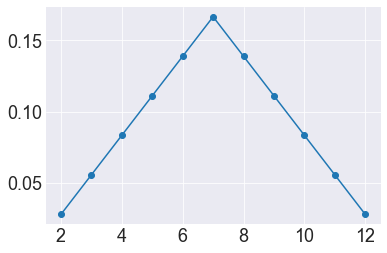

In [67]:
plt.plot(np.asarray(X).T[0],np.asarray(X).T[1],'-o')

**Programming Tip.**

In the preceding code note that `36.` is written with
the trailing decimal mark. This is a good habit to get into because division
in Python 2.x is integer division by default, which is not what we want here.
This can be fixed with a top-level `from __future__ import division`, but
that's easy to forget to do, especially when you are passing code
around and others may not reflexively do the future import.



The above example exposes the elements of probability theory that
are in play for this simple problem while deliberately suppressing some of the
gory technical details. 


With this framework, we can ask other questions like
**what is the probability that half the product of three dice will exceed the
their sum?** We can solve this using the same method as in the following. First,
let's create the first mapping,

In [28]:
dl = []
for i in range(1,7):
    for j in range(1,7):
        for k in range(1,7):
            dl.append([(i,j,k), ((i*j*k)/2>i+j+k)])

In [29]:
d = dict(dl)

In [30]:
len(d)

216

In [31]:
d=dict({(i,j,k):((i*j*k)/2>i+j+k) for i in range(1,7) 
                                  for j in range(1,7)  
                                  for k in range(1,7)})

In [32]:
len(d)

216

 **The keys of this dictionary are the triples and the values are the
logical values of whether or not half the product of three dice exceeds their sum.**


Now, we do the inverse mapping to collect the corresponding lists,

In [34]:
dinv = defaultdict(list)
for i,j in iter(d.items()): 
    dinv[j].append(i)

In [28]:
len(dinv)

2

 Note that `dinv` contains only two keys, `True` and `False`. Again,
because the dice are independent, the probability of any triple is $1/6^3$.
Finally, we collect this for each outcome as in the following,

In [36]:
X=[[i,len(j)/6.0**3] for i,j in iter(dinv.items())]
X

[[False, 0.37037037037037035], [True, 0.6296296296296297]]

 Thus, the probability of half the product of three dice exceeding their sum is
`136/(6.0**3) = 0.63`. The set that is induced by the random variable has only
two elements in it, `True` and `False`, with $\mathbb{P}(\mbox{True})=136/216$
and $\mathbb{P}(\mbox{False})=1-136/216$.

As a final example to exercise another layer of generality, **let is consider the
first problem with the two dice where we want the probability of a
seven, but this time one of the dice is no longer fair.**  The distribution for
the unfair die is the following:

$$
\begin{eqnarray*}
\mathbb{P}(\lbrace 1\rbrace)=\mathbb{P}(\lbrace 2 \rbrace)=\mathbb{P}(\lbrace 3 \rbrace)  = \frac{1}{9} \\\
\mathbb{P}(\lbrace 4\rbrace)=\mathbb{P}(\lbrace 5 \rbrace)=\mathbb{P}(\lbrace 6 \rbrace)  = \frac{2}{9} 
\end{eqnarray*}
$$

From our earlier work, we know the elements corresponding to the sum of seven
are the following:

$$
\lbrace (1,6),(2,5),(3,4),(4,3),(5,2),(6,1) \rbrace
$$

  Because we still have the independence assumption, **all we need to
change is the probability computation of each of elements.** For example, given
that the first die is the unfair one, we have

$$
\mathbb{P}((1,6)) = \mathbb{P}(1)\mathbb{P}(6) = \frac{1}{9} \times \frac{1}{6}
$$

  and likewise for $(2,5)$ we have the following:

$$
\mathbb{P}((2,5)) = \mathbb{P}(2)\mathbb{P}(5) = \frac{1}{9} \times \frac{1}{6}
$$

  and so forth. Summing all of these gives the following:

$$
\mathbb{P}_X(7) =  \frac{1}{9} \times \frac{1}{6} 
                      +\frac{1}{9} \times \frac{1}{6} 
                      +\frac{1}{9} \times \frac{1}{6} 
                      +\frac{2}{9} \times \frac{1}{6} 
                      +\frac{2}{9} \times \frac{1}{6} 
                      +\frac{2}{9} \times \frac{1}{6}  = \frac{1}{6}
$$

 Let's try computing this using Pandas instead
of Python dictionaries. First, we construct
a `DataFrame` object with an index of tuples
consisting of all pairs of possible dice outcomes.

In [69]:
d=pd.DataFrame(index=[(i,j) for i in range(1,7) for j in range(1,7)],
            columns=['sm','d1','d2','pd1','pd2','p'])

In [70]:
d

,sm,d1,d2,pd1,pd2,p
"(1, 1)",NaN,NaN,NaN,NaN,NaN,NaN
"(1, 2)",NaN,NaN,NaN,NaN,NaN,NaN
"(1, 3)",NaN,NaN,NaN,NaN,NaN,NaN
"(1, 4)",NaN,NaN,NaN,NaN,NaN,NaN
"(1, 5)",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
"(6, 2)",NaN,NaN,NaN,NaN,NaN,NaN
"(6, 3)",NaN,NaN,NaN,NaN,NaN,NaN
"(6, 4)",NaN,NaN,NaN,NaN,NaN,NaN
"(6, 5)",NaN,NaN,NaN,NaN,NaN,NaN


 Now, we can populate the columns that we set up above
where the outcome of the first die is the `d1` column and
the outcome of the second die is `d2`,

In [71]:
d.d1=[i[0] for i in d.index]
d.d2=[i[1] for i in d.index]

In [72]:
d

,sm,d1,d2,pd1,pd2,p
"(1, 1)",NaN,1,1,NaN,NaN,NaN
"(1, 2)",NaN,1,2,NaN,NaN,NaN
"(1, 3)",NaN,1,3,NaN,NaN,NaN
"(1, 4)",NaN,1,4,NaN,NaN,NaN
"(1, 5)",NaN,1,5,NaN,NaN,NaN
...,...,...,...,...,...,...
"(6, 2)",NaN,6,2,NaN,NaN,NaN
"(6, 3)",NaN,6,3,NaN,NaN,NaN
"(6, 4)",NaN,6,4,NaN,NaN,NaN
"(6, 5)",NaN,6,5,NaN,NaN,NaN


 Next, we compute the sum of the dices in the `sm`
column,

In [73]:
d.sm = d.d1+d.d2

In [74]:
d.sm=list(map(sum,d.index))

 With that established, the DataFrame now looks like
the following:

In [75]:
d

,sm,d1,d2,pd1,pd2,p
"(1, 1)",2,1,1,NaN,NaN,NaN
"(1, 2)",3,1,2,NaN,NaN,NaN
"(1, 3)",4,1,3,NaN,NaN,NaN
"(1, 4)",5,1,4,NaN,NaN,NaN
"(1, 5)",6,1,5,NaN,NaN,NaN
...,...,...,...,...,...,...
"(6, 2)",8,6,2,NaN,NaN,NaN
"(6, 3)",9,6,3,NaN,NaN,NaN
"(6, 4)",10,6,4,NaN,NaN,NaN
"(6, 5)",11,6,5,NaN,NaN,NaN


 Next, we fill out the probabilities for each face of the
unfair die (`d1`) and the fair die (`d2`),

In [48]:
d.loc[d.d1<=3,'pd1']

(1, 1)    NaN
(1, 2)    NaN
(1, 3)    NaN
(1, 4)    NaN
(1, 5)    NaN
         ... 
(3, 2)    NaN
(3, 3)    NaN
(3, 4)    NaN
(3, 5)    NaN
(3, 6)    NaN
Name: pd1, Length: 18, dtype: object

In [76]:
d.loc[d.d1<=3,'pd1'] = 1/9
d.loc[d.d1 > 3,'pd1']= 2/9
d.pd2=1/6.

In [52]:
d

,sm,d1,d2,pd1,pd2,p
"(1, 1)",2,1,1,0.111111,0.166667,NaN
"(1, 2)",3,1,2,0.111111,0.166667,NaN
"(1, 3)",4,1,3,0.111111,0.166667,NaN
"(1, 4)",5,1,4,0.111111,0.166667,NaN
"(1, 5)",6,1,5,0.111111,0.166667,NaN
...,...,...,...,...,...,...
"(6, 2)",8,6,2,0.222222,0.166667,NaN
"(6, 3)",9,6,3,0.222222,0.166667,NaN
"(6, 4)",10,6,4,0.222222,0.166667,NaN
"(6, 5)",11,6,5,0.222222,0.166667,NaN


 Finally, we can compute the joint probabilities
for the sum of the shown faces as the following:

In [77]:
d.p = d.pd1 * d.pd2

In [78]:
d

,sm,d1,d2,pd1,pd2,p
"(1, 1)",2,1,1,0.111111,0.166667,0.0185185
"(1, 2)",3,1,2,0.111111,0.166667,0.0185185
"(1, 3)",4,1,3,0.111111,0.166667,0.0185185
"(1, 4)",5,1,4,0.111111,0.166667,0.0185185
"(1, 5)",6,1,5,0.111111,0.166667,0.0185185
...,...,...,...,...,...,...
"(6, 2)",8,6,2,0.222222,0.166667,0.037037
"(6, 3)",9,6,3,0.222222,0.166667,0.037037
"(6, 4)",10,6,4,0.222222,0.166667,0.037037
"(6, 5)",11,6,5,0.222222,0.166667,0.037037


 With all that established, we can compute the
density of all the dice outcomes by using `groupby` as in the
following,

In [56]:
d.groupby('sm')['p'].sum()

sm
2     0.018519
3     0.037037
4     0.055556
5     0.092593
6     0.129630
        ...   
8     0.148148
9     0.129630
10    0.111111
11    0.074074
12    0.037037
Name: p, Length: 11, dtype: float64

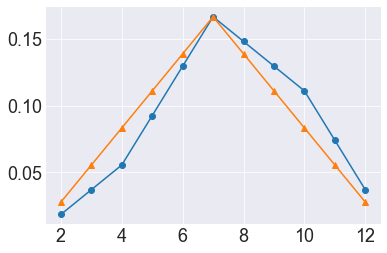

In [79]:
plt.plot(d.groupby('sm')['p'].sum(),'-o')
plt.plot(np.asarray(X).T[0],np.asarray(X).T[1],'-^')

  These examples have shown how the theory of probability
breaks down sets and measurements of  those sets and how these can be
combined to develop the probability mass functions for new random
variables. 

## Continuous Random Variables

**The same ideas work with continuous variables but managing the sets
becomes trickier because the real line, unlike discrete sets, has many
limiting properties already built into it that have to be handled
carefully.**  

Nonetheless, let's start with an example that should
illustrate the analogous ideas. 

Suppose a random variable $X$ is
uniformly distributed on the unit interval. What is the probability
that the variable takes on values less than 1/2? 

In order to build intuition onto the discrete case, let's go back to our
dice-throwing experiment with the fair dice. The **sum of the values of the dice
is a measurable function,**

$$
Y \colon \lbrace 1,2,\dots,6 \rbrace^2 \mapsto \lbrace 2,3,\ldots, 12 \rbrace
$$

 **That is, $Y$ is a mapping of the cartesian product of sets to a
discrete set of outcomes.** 

In order to compute probabilities of the set of
outcomes, we need to derive the probability measure for $Y$, $\mathbb{P}_Y$,
from the corresponding probability measures for each die. Our previous discussion
went through the mechanics of that. This means that

$$
\mathbb{P}_Y \colon \lbrace 2,3,\ldots,12 \rbrace \mapsto [0,1]
$$

 Note there is a separation between the function definition and where the
target items of the function are measured in probability. 

More bluntly,

$$
Y \colon A \mapsto B
$$

 with,

$$
\mathbb{P}_Y \colon B \mapsto [0,1]
$$

 **Thus, to compute $\mathbb{P}_Y$, which is derived 
from other random variables, we have to express the equivalence classes
in $B$ in terms of their progenitor $A$ sets.**

The situation for continuous variables follows the same pattern, but
with many more deep technicalities that we are going to skip. For the continuous
case, the random variable is now,

$$
X \colon \mathbb{R} \mapsto \mathbb{R}
$$

 with corresponding probability measure,

$$
\mathbb{P}_X \colon \mathbb{R} \mapsto [0,1]
$$

**But where are the corresponding sets here? Technically, these are the
*Borel* sets, but we can just think of them as intervals.**

Returning to our
question, what is the probability that a uniformly distributed random variable
on the unit interval takes values less than $1/2$? 

Rephrasing this question
according to the framework, we have the following:

$$
X \colon [0,1] \mapsto [0,1]
$$

 with corresponding,

$$
\mathbb{P}_X \colon [0,1] \mapsto [0,1]
$$

 **To answer the question,  by the definition of the uniform random
variable on the unit interval, we compute the following integral,**

$$
\mathbb{P}_X([0,1/2]) = \mathbb{P}_X(0 < X < 1/2) =  \int_0^{1/2} dx  = 1/2
$$

  where the above integral's $dx$ sweeps through intervals of the
$B$-type. The measure of any $dx$ interval (i.e., $A$-type set) is equal to
$dx$, by definition of the uniform random variable. To get all the moving parts
into one notationally rich integral, we can also  write this  as,

$$
\mathbb{P}_X(0 < X < 1/2) = \int_0^{ 1/2 } d\mathbb{P}_X(dx) = 1/2
$$

**Now, let's consider a slightly more complicated and interesting example. As
before, suppose we have a uniform random variable, $X$ and let us introduce
another random variable defined,**

$$
Y = 2 X
$$

Now, **what is the probability that $0 < Y < \frac{1}{2}$?**


To express this in our framework, we write,

$$
Y \colon [0,1] \mapsto [0,2]
$$

 with corresponding,

$$
\mathbb{P}_Y \colon [0,2] \mapsto [0,1]
$$

 To answer the question, we need to measure the set $[0,1/2]$, with
the probability measure for $Y$, $\mathbb{P}_Y([0,1/2])$. 

How can we do this?

Because $Y$ is derived from the $X$ random variable, as with the fair-dice
throwing experiment, we have to create a set of equivalences in the target
space (i.e., $B$-type sets) that reflect back on the input space (i.e.,
$A$-type sets). 

**That is, what is the interval $[0,1/2]$ equivalent to in terms
of the $X$ random variable?**

Because, functionally, $Y=2 X$, then the $B$-type
interval $[0,1/2]$ corresponds to the $A$-type interval $[0,1/4]$. 

From the
probability measure of $X$, we compute this with the integral,

$$
\mathbb{P}_Y([0,1/2]) =\mathbb{P}_X([0,1/4])=  \int_0^{1/4} dx  = 1/4
$$

Now, **let's up the ante and consider the following random variable,**

$$
Y = X^2
$$

 where now $X$ is still uniformly distributed, but now over the
interval $[-1/2,1/2]$.  

We can express this in our framework as,

$$
Y \colon [-1/2,1/2] \mapsto [0,1/4]
$$

 with corresponding,

$$
\mathbb{P}_Y \colon [0,1/4] \mapsto [0,1]
$$

 What is the $\mathbb{P}_Y(Y < 1/8)$?  In other words, what is the
measure of the set $B_Y= [0,1/8]$? 


As before, because $X$ is derived from our
uniformly distributed random variable, we have to reflect the $B_Y$ set onto
sets of the $A$-type.  


**The thing to recognize is that because $X^2$
is symmetric about zero, all $B_Y$ sets reflect back into two sets.**


**This means that for any set $B_Y$, we have the correspondence $B_Y = A_X^+ \cup
A_X^{-}$.  So, we have,**

$$
B_Y=\Big\lbrace 0<Y<\frac{1}{8}\Big\rbrace=\Big\lbrace 0<X<\frac{1}{\sqrt{8}} \Big\rbrace \bigcup \Big\lbrace -\frac{1}{\sqrt {8}}<X<0 \Big\rbrace
$$

  From this perspective, we have the following solution,

$$
\mathbb{P}_Y(B_Y)=\mathbb{P}(A_X^+)/2 + \mathbb{P}(A_X^{-})/2
$$

  where the $\frac{1}{2}$ comes from normalizing the $\mathbb{P}_Y$ to
one. Also,

$$
A_X^+    = \Big\lbrace 0<  X<\frac{1}{\sqrt{8}}   \Big\rbrace
$$

$$
\
A_X^{-}  = \Big\lbrace -\frac{1}{\sqrt {8}} <  X<0 \Big\rbrace
$$

  Therefore,

$$
\mathbb{P}_Y(B_Y) = \frac{1}{2\sqrt 8} + \frac{1}{2\sqrt 8}
$$

  because $\mathbb{P}(A_X^+) =\mathbb{P}(A_X^-) = 1/\sqrt 8$.  
  
  
  Let's
see if this comes out using the usual transformation of variables method from
calculus. Using this method, the density 

$f_Y(y) dy = f_X(x)dx$,

$f_Y(y) = f_X(x)\frac{dx}{dy}\big|_{x\to y}$,

$y = x^2$

$x = y^{1/2}$

$\frac{dx}{dy} = \frac{1}{2 y^{1/2}}$

$f_Y(y) = f_X(\sqrt y)/(2 \sqrt y) =
\frac{1}{2 \sqrt y} $. Then, we obtain,


$$
\int_0^{\frac{1}{8}} \frac{1}{2 \sqrt y} dy = \frac{1}{\sqrt 8}
$$

  which is what we got using the sets method. 
  
  **Note that you would
favor the calculus method in practice, but it is important to
understand the deeper mechanics, because sometimes
the usual calculus method fails, as the next problem shows.**

## Transformation of Variables Beyond Calculus

Suppose $X$ and $Y$ are uniformly distributed in the unit interval and we
define $Z$ as

$$
Z = \frac{X}{Y-X}
$$

  What is the $f_Z(z)$? If you try this using the usual calculus
method, you will fail (try it!). 

The problem is one of the technical prerequisites for the calculus method is not in force.

The key observation is that $Z \notin [-1,0]$.

**Both $X$ and $Y$ are positives.**

- **Assuming $Y>X$, so $Y-X>0$, and so $Z>0$;**
- **Assuming $Y<X$, so $Y-X<0$, and so $Z<-1$.**

If this were possible, the $X$ and $Y$ would have different signs, which cannot happen,
given that $X$ and $Y$ are uniformly distributed over $[0,1]$. 

Now, let's consider when $Z>0$. In this case, $Y>X$ because $Z$ cannot be positive
otherwise. 

For the density function, we are interested in the set  $\lbrace  0 < Z < z \rbrace $. We want to compute

$$
\mathbb{P}(Z<z) = \int \int B_1 dX dY
$$

 with,

$$
B_1 = \lbrace 0 < Z < z \rbrace
$$

  Now, we have to translate that interval into an interval
relevant to $X$ and $Y$. 

- For $0 < Z$, we have $ Y > X$. 

- For $Z < z $, we have $\frac{X}{Y-X}<z \implies
Y > X(1/z+1)$. 

Putting this together gives

$$
A_1 = \lbrace \max (X,X(1/z+1)) < Y < 1 \rbrace
$$

  Integrating this over $Y$ as follows,

$$
\int_0^1\lbrace\max(X,X(1/z+1))<Y<1 \rbrace dY = 1 - \max(X,X(1/z+1)) =\\
1 -X(1/z+1) =\frac{z-X-Xz}{z}\\\mbox{ where } z > \frac{X}{1-X}
$$

Notice that

$\max(X,X(1/z+1))$ with $z=\frac{X}{1-X}$ is $\max(X,X)=X$.

otherwise $\max(X,X(1/z+1)) = X(1/z+1)$ for $z > \frac{X}{1-X}$. 

Solving for $X$, we have

$ X < \frac{Z}{1+Z}$,


 and integrating this one more time over $X$ gives

$$
\int_0^{\frac{z}{1+z}} \frac{-X+z-Xz}{z} dX = \frac{z}{2(z+1)} \mbox{ where }  z > 0
$$

 Note that this is the computation for the *probability*
itself, not the probability density function. To get that, all we have
to do is differentiate $\left(f_Z(z)=\frac{d P(Z<z)}{dz}\right)$ the last expression to obtain

$$
f_Z(z) = \frac{1}{(z+1)^2} \mbox{ where }  z > 0
$$

 Now we need to compute this density using the same process
for when $Z < -1$. 

We want  the interval $ Z < z $ for when $Z < -1$.

For a fixed $z$, this is equivalent to $\frac{X}{Y-X}<z \implies X(1+1/z) < Y$. 

Because $z$ is negative (and $z<-1$), this also means that 

$(1+1/z) > 0 \implies X < Y \implies Y > X$. 

Under these terms, we
have the following integral,

$$
\int_0^1 \lbrace X(1/z+1) <Y< X\rbrace dY = X - X(1/z+1)\\
-\frac{X}{z} \mbox{ where }  z < -1
$$

 and integrating this one more time over $X$ gives the following

$$
-\frac{1}{2 z} \mbox{ where }  z < -1
$$

 To get the density for $z<-1$, we differentiate this with
respect to $z$ to obtain the following,

$$
f_Z(z) = \frac{1}{2 z^2} \mbox{ where }  z < -1
$$

 Putting this all together, we obtain,

$$
f_Z(z) = 
\begin{cases}
      \frac{1}{(z+1)^2}     & \mbox{if }  z > 0 \\\
      \frac{1}{2 z^2}       & \mbox{if }  z < -1 \\\
      0 & \mbox{otherwise }
\end{cases}
$$

  We will leave it as an exercise to show that this
integrates out to one. But let's try to simulate this process.

In [91]:
import sympy as sym

In [92]:
z = sym.Symbol('z')

In [93]:
sym.integrate(1/(z+1)**2,(z,0,sym.oo))

1

In [94]:
sym.integrate(1/(z)**2,(z,-sym.oo,-1))

1

We need to divide by 2!

$$
f_Z(z) = 
\begin{cases}
      \frac{1}{2(z+1)^2}     & \mbox{if }  z > 0 \\\
      \frac{1}{4 z^2}       & \mbox{if }  z < -1 \\\
      0 & \mbox{otherwise }
\end{cases}
$$

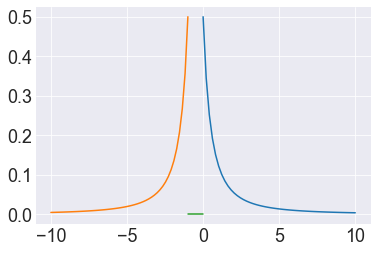

In [96]:
z0 = np.linspace(0,10)
zn = np.linspace(-10,-1)
zo = np.linspace(-1,0)

plt.plot(z0,(1/2)/(z0+1)**2)
plt.plot(zn,(1/2)/(zn)**2)
plt.plot(zo,0*zo)

In [97]:
X = np.random.rand(1000)
Y = np.random.rand(1000)
Z = X/(Y-X)

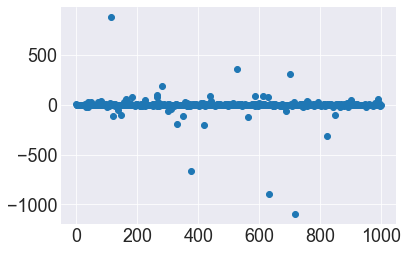

In [101]:
plt.plot(Z,'o')

(-2, 1)

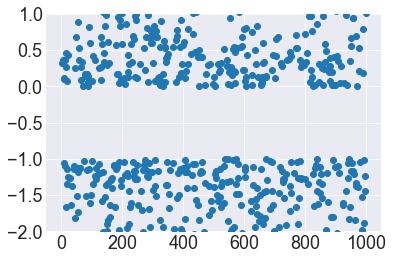

In [99]:
plt.plot(Z,'o')
plt.ylim(-2,1)

In [109]:
X = np.random.rand(10000)
Y = np.random.rand(10000)
Z = X/(Y-X)

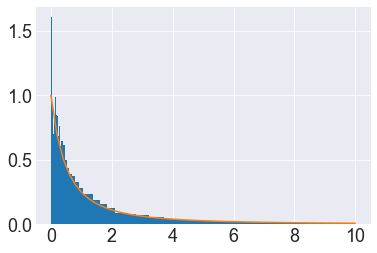

In [110]:
bins = np.logspace(-2,1)
_, _, _, = plt.hist(Z[Z>0],bins=bins,density=True)
plt.plot(z0,(1)/(z0+1)**2)

In [112]:
-np.logspace(0,1)

array([ -1.        ,  -1.04811313,  -1.09854114,  -1.1513954 ,
        -1.20679264,  -1.26485522,  -1.32571137,  -1.38949549,
        -1.45634848,  -1.52641797,  -1.59985872,  -1.67683294,
        -1.75751062,  -1.84206997,  -1.93069773,  -2.02358965,
        -2.12095089,  -2.22299648,  -2.32995181,  -2.44205309,
        -2.55954792,  -2.6826958 ,  -2.8117687 ,  -2.9470517 ,
        -3.0888436 ,  -3.23745754,  -3.39322177,  -3.55648031,
        -3.72759372,  -3.90693994,  -4.09491506,  -4.29193426,
        -4.49843267,  -4.71486636,  -4.94171336,  -5.17947468,
        -5.42867544,  -5.68986603,  -5.96362332,  -6.25055193,
        -6.55128557,  -6.86648845,  -7.19685673,  -7.54312006,
        -7.90604321,  -8.28642773,  -8.68511374,  -9.10298178,
        -9.54095476, -10.        ])

In [113]:
-np.logspace(0,1)[::-1]

array([-10.        ,  -9.54095476,  -9.10298178,  -8.68511374,
        -8.28642773,  -7.90604321,  -7.54312006,  -7.19685673,
        -6.86648845,  -6.55128557,  -6.25055193,  -5.96362332,
        -5.68986603,  -5.42867544,  -5.17947468,  -4.94171336,
        -4.71486636,  -4.49843267,  -4.29193426,  -4.09491506,
        -3.90693994,  -3.72759372,  -3.55648031,  -3.39322177,
        -3.23745754,  -3.0888436 ,  -2.9470517 ,  -2.8117687 ,
        -2.6826958 ,  -2.55954792,  -2.44205309,  -2.32995181,
        -2.22299648,  -2.12095089,  -2.02358965,  -1.93069773,
        -1.84206997,  -1.75751062,  -1.67683294,  -1.59985872,
        -1.52641797,  -1.45634848,  -1.38949549,  -1.32571137,
        -1.26485522,  -1.20679264,  -1.1513954 ,  -1.09854114,
        -1.04811313,  -1.        ])

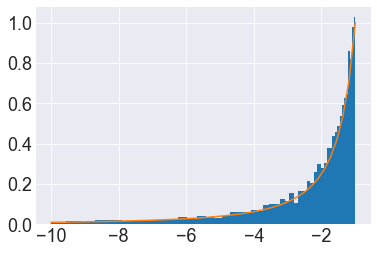

In [114]:
bins = -np.logspace(0,1)[::-1]
_, _, _, = plt.hist(Z[Z<-1],bins=bins,density=True)
plt.plot(zn,(1)/(zn)**2)

## Independent Random Variables

Independence is a standard assumption. Mathematically, the
necessary and sufficient condition for independence between two
random variables $X$  and $Y$ is the following:

$$
\mathbb{P}(X,Y) = \mathbb{P}(X)\mathbb{P}(Y)
$$

 Two random variables $X$  and $Y$ 
are *uncorrelated* if,

$$
\mathbb{E}(X-\overline{X})\mathbb{E}(Y-\overline{Y})=0
$$

 where $\overline{X}=\mathbb{E}(X)$ Note that uncorrelated random
variables are sometimes called *orthogonal* random variables.  Uncorrelatedness
is a weaker property than independence, however. For example, consider the
discrete random variables $X$ and $Y$ uniformly distributed over the set
$\lbrace 1,2,3 \rbrace$ where

$$
X =  
\begin{cases} 
1 & \mbox{if } \omega =1 \\\
0 & \mbox{if } \omega =2  \\\
-1 & \mbox{if } \omega =3
\end{cases}
$$

 and also,

$$
Y =  
\begin{cases} 
0 & \mbox{if } \omega =1 \\\
1 & \mbox{if } \omega =2 \\\
0 & \mbox{if } \omega =3
\end{cases}
$$

 Thus, $\mathbb{E}(X)=0$ and $\mathbb{E}(X Y)=0$, so
$X$ and $Y$ are uncorrelated. However, we have

$$
\mathbb{P}(X=1,Y=1)=0\neq \mathbb{P}(X=1)\mathbb{P}(Y=1)=\frac{1}{9}
$$

 So, these two random variables are *not* independent.
Thus, uncorrelatedness does not imply independence, generally, but
there is the important case of Gaussian random variables for which
it does. To see this, consider the probability density function
for two zero-mean, unit-variance Gaussian random variables $X$ and
$Y$,

$$
f_{X,Y}(x,y) = \frac{e^{\frac{x^2-2 \rho x
   y+y^2}{2 \left(\rho^2-1\right)}}}{2 \pi 
   \sqrt{1-\rho^2}}
$$

 where $\rho:=\mathbb{E}(X Y)$  is the correlation coefficient.  In
the uncorrelated case where $\rho=0$, the probability density function factors
into the following,

$$
f_{X,Y}(x,y)=\frac{e^{-\frac{1}{2}\left(x^2+y^2\right)}}{2\pi}=\frac{e^{-\frac{x^2}{2}}}{\sqrt{2\pi}}\frac{e^{-\frac{y^2}{2}}}{\sqrt{2\pi}}    =f_X(x)f_Y(y)
$$

 which means that $X$ and $Y$ are independent.

Independence and conditional independence are closely related, as in the following:

$$
\mathbb{P}(X,Y\vert Z) =\mathbb{P}(X\vert Z) \mathbb{P}(Y\vert Z)
$$

 which says that $X$ and $Y$ and independent conditioned
on $Z$.  Conditioning independent random variables can break
their independence. For example, consider two independent
Bernoulli-distributed random variables,  $X_1, X_2\in\lbrace 0,1
\rbrace$.  We define $Z=X_1+X_2$. Note that $Z\in \lbrace
0,1,2 \rbrace$. In the case where $Z=1$, we have,

$$
\mathbb{P}(X_1\vert Z=1) >0
$$

$$
\
\mathbb{P}(X_2\vert Z=1) >0
$$

 Even though $X_1,X_2$ are independent,
after conditioning on $Z$, we have the following,

$$
\mathbb{P}(X_1=1,X_2=1\vert Z=1)=0\neq \mathbb{P}(X_1=1\vert Z=1)\mathbb{P}(X_2=1\vert Z=1)
$$

 Thus, conditioning on $Z$ breaks the independence of
$X_1,X_2$. This also works in the opposite direction ---
conditioning can make dependent random variables independent.
Define $Z_n=\sum_i^n X_i$ with $X_i$ independent, integer-valued
random variables.  The $Z_n$ variables are 
dependent because they stack the same telescoping set of
$X_i$ variables. Consider the following,

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
\mathbb{P}(Z_1=i,Z_3=j\vert Z_2=k) = \frac{\mathbb{P}(Z_1=i,Z_2=k,Z_3=j)}{\mathbb{P}(Z_2 =k)}
\label{_auto1} \tag{1}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="eq:condIndep"></div>

$$
\begin{equation} \
=\frac{\mathbb{P}(X_1 =i)\mathbb{P}(X_2 =k-i)\mathbb{P}(X_3 =j-k) }{\mathbb{P}(Z_2 =k)}
\end{equation} 
\label{eq:condIndep} \tag{2}
$$

 where the factorization comes from the independence of
the $X_i$ variables. Using the definition of conditional
probability,

$$
\mathbb{P}(Z_1=i\vert Z_2)=\frac{\mathbb{P}(Z_1=i,Z_2=k)}{\mathbb{P}(Z_2=k)}
$$

 We can continue to expand Equation ref{eq:condIndep},

$$
\mathbb{P}(Z_1=i,Z_3=j\vert Z_2=k) =\mathbb{P}(Z_1 =i\vert Z_2) \frac{\mathbb{P}( X_3 =j-k)\mathbb{P}( Z_2 =k)}{\mathbb{P}( Z_2 =k)}
$$

$$
\
                                   =\mathbb{P}(Z_1 =i\vert Z_2)\mathbb{P}(Z_3 =j\vert Z_2)
$$

 where $\mathbb{P}(X_3=j-k)\mathbb{P}(Z_2=k)=
\mathbb{P}(Z_3=j,Z_2)$.  Thus, we see that dependence between
random variables can be broken by conditioning to create
conditionally independent random variables. As we have just
witnessed, understanding how conditioning influences independence
is important and is the main topic of
study in Probabilistic Graphical Models, a field
with many algorithms and concepts to extract these
notions of conditional independence from graph-based
representations of random variables.


## Classic Broken Rod Example

Let's do one last example to exercise fluency in our methods by
considering the following classic problem: given a rod of unit-length,
broken independently and randomly at two places, what is the
probability that you can assemble the three remaining pieces into a
triangle? The first task is to find a representation of a triangle as
an easy-to-apply constraint. What we want is something like the
following:

$$
\mathbb{P}(\mbox{ triangle exists }) = \int_0^1 \int_0^1 \lbrace \mbox{ triangle exists }  \rbrace dX dY
$$

 where $X$ and $Y$ are independent and uniformly distributed
in the unit-interval.  Heron's formula for the area of the triangle,

$$
\mbox{ area } = \sqrt{(s-a)(s-b)(s-c)s}
$$

 where $s = (a+b+c)/2$ is what we need. The idea is that this
yields a valid area only when each of the terms under the square root is
greater than or equal to zero. Thus, suppose that we have

$$
\begin{eqnarray*}
a  & = &  X  \\\
b  & = & Y-X \\\
c  & = & 1-Y 
\end{eqnarray*}
$$

 assuming that $Y>X$.  Thus, the criterion for a valid triangle boils down
to

$$
\lbrace (s > a) \wedge (s > b) \wedge (s > c) \wedge (X<Y) \rbrace
$$

 After a bit of manipulation, this  consolidates into:

$$
\Big\lbrace \frac{1}{2} < Y < 1 \bigwedge \frac{1}{2}(2 Y-1) < X < \frac{1}{2} \Big\rbrace
$$

  which we integrate out by $dX$ first to obtain

$$
\mathbb{P}(\mbox{ triangle exists }) = \int_{0}^1 \int_{0}^1 \Big\lbrace \frac{1}{2} < Y < 1 \bigwedge \frac{1}{2}(2 Y-1) < X < \frac{1}{2} \Big\rbrace dX dY
$$

$$
\mathbb{P}(\mbox{ triangle exists }) = \int_{\frac{1}{2}}^1 (1-Y) dY
$$

 and then by $dY$ to obtain finally,

$$
\mathbb{P}(\mbox{ triangle exists }) = \frac{1}{8}
$$

 when $Y>X$. By symmetry, we get the same result for $X>Y$. Thus, the
final result is the following:

$$
\mathbb{P}(\mbox{ triangle exists }) = \frac{1}{8}+\frac{1}{8} = \frac{1}{4}
$$

We can quickly check using this result using Python for the case $Y>X$ using
the following code:

In [53]:
>>> import numpy as np
>>> x,y = np.random.rand(2,1000) # uniform rv
>>> a,b,c = x,(y-x),1-y # 3 sides
>>> s = (a+b+c)/2
>>> np.mean((s>a) & (s>b)  & (s>c) & (y>x)) # approx 1/8=0.125

0.13700000000000001

**Programming Tip.**

The chained logical `&` symbols above tell Numpy that the logical operation
should be considered element-wise.